In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split 
#from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
#from sklearn import preprocessing
from sklearn.metrics import classification_report 

Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Insurance Dataset.csv")
data.head()

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,0,Cellulitis & other skin infections,3,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,122,0,Other pneumonia,2,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1


In [ ]:
#The method .copy() is used here so that any changes made in new DataFrame don't get reflected in the original one
data1=data.copy()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


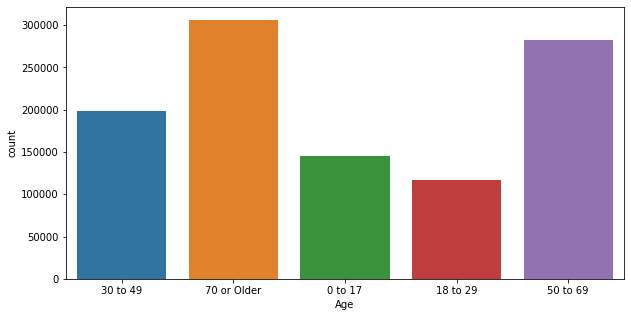

In [5]:
plt.figure(figsize=(10,5))
sns.countplot(data['Age'])

Performing EDA
Checking for null values

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1046119 non-null  object 
 1   Hospital County                        1046119 non-null  object 
 2   Hospital Id                            1046119 non-null  float64
 3   Age                                    1048575 non-null  object 
 4   Gender                                 1048575 non-null  object 
 5   Cultural_group                         1048575 non-null  object 
 6   ethnicity                              1048575 non-null  object 
 7   Days_spend_hsptl                       1048575 non-null  object 
 8   Admission_type                         1048575 non-null  object 
 9   Home or self care,                     1048575 non-null  object 
 10  ccs_diagnosis_code                     104

In [ ]:
data1.shape

(1048575, 24)

In [ ]:
data1.isna().sum()

Area_Service                             2456
Hospital County                          2456
Hospital Id                              2456
Age                                         0
Gender                                      0
Cultural_group                              0
ethnicity                                   0
Days_spend_hsptl                            0
Admission_type                              0
Home or self care,                          0
ccs_diagnosis_code                          0
ccs_procedure_code                          0
apr_drg_description                         0
Code_illness                                0
Mortality risk                             42
Surg_Description                            0
Weight_baby                                 0
Abortion                                    0
Emergency dept_yes/No                       0
Tot_charg                                   0
Tot_cost                                    0
ratio_of_total_costs_to_total_char

# checking the mode of Area_Service,Hospital Id,Hospital County,Mortality risk

In [ ]:
data1['Area_Service'].mode()

0    Hudson Valley
dtype: object

In [ ]:
data1['Hospital Id'].mode()

0    413.0
dtype: float64

In [ ]:
data1['Hospital County'].mode()

0    Erie
dtype: object

In [ ]:
data1['Mortality risk'].mode()

0    1.0
dtype: float64

 Fill nan values with mode value

In [ ]:
data1["Area_Service"].fillna('Hudson Valley',inplace=True) # data['Area_Service'].mode() = Hudson Valley
data1["Hospital Id"].fillna(413.0,inplace=True) # data['Hospital Id'].mode() = 413.0
data1["Hospital County"].fillna('Erie',inplace=True) # data['Hospital County'].mode() = Erie
data1["Mortality risk"].fillna(1.0,inplace=True) # data['Mortality risk'].mode() = 1.0

In [ ]:
data1.isna().sum() # it is clear that the data is cleaned

Area_Service                             0
Hospital County                          0
Hospital Id                              0
Age                                      0
Gender                                   0
Cultural_group                           0
ethnicity                                0
Days_spend_hsptl                         0
Admission_type                           0
Home or self care,                       0
ccs_diagnosis_code                       0
ccs_procedure_code                       0
apr_drg_description                      0
Code_illness                             0
Mortality risk                           0
Surg_Description                         0
Weight_baby                              0
Abortion                                 0
Emergency dept_yes/No                    0
Tot_charg                                0
Tot_cost                                 0
ratio_of_total_costs_to_total_charges    0
Result                                   0
Payment_Typ

# Checking for duplicte rows

In [ ]:
#Print the duplicated rows
data1[data1.duplicated()]

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
1125,Western NY,Allegany,39.0,0 to 17,M,White,Not Span/Hispanic,2,Newborn,Home or Self Care,218,115,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,3700,N,N,1678.75,737.21,0.439141,1,1
3086,Western NY,Cattaraugus,66.0,0 to 17,M,White,Not Span/Hispanic,2,Newborn,Home or Self Care,218,115,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,3600,N,N,1251.50,829.70,0.662961,0,1
3226,Western NY,Cattaraugus,66.0,0 to 17,F,White,Not Span/Hispanic,2,Newborn,Home or Self Care,218,0,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,2700,N,N,1150.50,788.65,0.685486,1,1
4209,Western NY,Cattaraugus,66.0,0 to 17,F,White,Not Span/Hispanic,2,Newborn,Home or Self Care,218,0,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,2700,N,N,1150.50,788.65,0.685486,1,1
4234,Western NY,Cattaraugus,66.0,0 to 17,F,White,Not Span/Hispanic,2,Newborn,Home or Self Care,218,0,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,2800,N,N,1150.50,788.65,0.685486,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015327,New York City,Bronx,1168.0,0 to 17,F,Other Race,Not Span/Hispanic,2,Newborn,Home or Self Care,218,228,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,2900,N,N,5955.85,1303.62,0.218881,1,3
1025529,New York City,Bronx,1169.0,0 to 17,F,Other Race,Spanish/Hispanic,2,Elective,Home or Self Care,83,227,Seizure,2,1.0,Medical,0,N,N,12500.00,2960.11,0.236809,1,3
1028997,New York City,Bronx,1169.0,0 to 17,F,Other Race,Spanish/Hispanic,2,Elective,Home or Self Care,83,227,Seizure,1,1.0,Medical,0,N,N,12557.00,2963.40,0.235996,1,2
1035973,New York City,Bronx,1169.0,0 to 17,F,Other Race,Spanish/Hispanic,2,Elective,Home or Self Care,83,227,Seizure,2,1.0,Medical,0,N,N,12500.00,2960.11,0.236809,1,3


In [ ]:
#Count of duplicated rows
data[data.duplicated()].shape

(4814, 24)

In [ ]:
data_cleaned=data1.drop_duplicates()

In [ ]:
data_cleaned.shape

(1043761, 24)

# Removing the outliers

In [ ]:
Q1 = data_cleaned.quantile(0.25)
Q3 = data_cleaned.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Hospital Id                                764.000000
ccs_diagnosis_code                         110.000000
ccs_procedure_code                         172.000000
Code_illness                                 2.000000
Mortality risk                               2.000000
Weight_baby                                  0.000000
Tot_charg                                21768.750000
Tot_cost                                  8115.200000
ratio_of_total_costs_to_total_charges        0.205405
Result                                       1.000000
Payment_Typology                             2.000000
dtype: float64


In [ ]:
data_cleaned = data_cleaned[~((data_cleaned < (Q1 - 1.5 * IQR)) |(data_cleaned > (Q3 + 1.5 * IQR))).any(axis=1)]

# Let us check count plots for categorical to find which category is having more frequent values

In [ ]:
data_cleaned['Admission_type'].value_counts()

Emergency        445460
Elective         172622
Urgent            80515
Trauma             1660
Not Available       797
Newborn              58
Name: Admission_type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


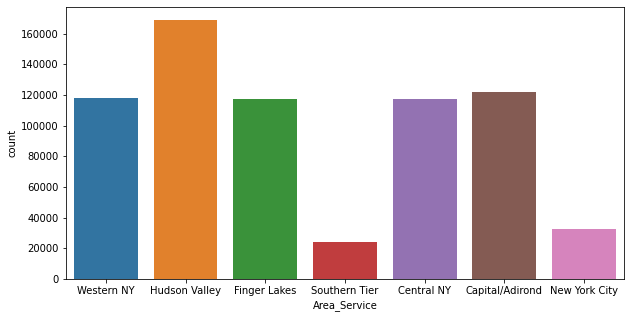

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data_cleaned['Area_Service'])

In [ ]:
len(data_cleaned['Days_spend_hsptl'].unique())

57

In [ ]:
data_cleaned['Days_spend_hsptl'].unique()

array(['3', '1', '2', '14', '5', '4', '9', '8', '10', '6', '12', '7',
       '11', '13', '16', '15', '18', '23', '21', '22', '19', '24', '20',
       '17', '26', '58', '30', '27', '34', '70', '31', '25', '29', '32',
       '28', '33', '36', '37', '35', '120 +', '48', '60', '97', '50',
       '66', '64', '53', '56', '38', '41', '40', '46', '51', '44', '43',
       '39', '42'], dtype=object)

In [ ]:
data_cleaned['Days_spend_hsptl'].replace(to_replace='120 +',value='121',inplace=True)

In [ ]:
data_cleaned['Days_spend_hsptl']=data_cleaned['Days_spend_hsptl'].astype('int64')

In [ ]:
data_cleaned['Days_spend_hsptl'].unique()

array([  3,   1,   2,  14,   5,   4,   9,   8,  10,   6,  12,   7,  11,
        13,  16,  15,  18,  23,  21,  22,  19,  24,  20,  17,  26,  58,
        30,  27,  34,  70,  31,  25,  29,  32,  28,  33,  36,  37,  35,
       121,  48,  60,  97,  50,  66,  64,  53,  56,  38,  41,  40,  46,
        51,  44,  43,  39,  42])

(array([9.54404e+05, 1.72400e+03, 9.57200e+03, 5.41370e+04, 2.75090e+04,
        1.17500e+03, 4.40000e+01, 5.00000e+00, 2.00000e+00, 3.00000e+00]),
 array([   0.,  900., 1800., 2700., 3600., 4500., 5400., 6300., 7200.,
        8100., 9000.]),
 <a list of 10 Patch objects>)

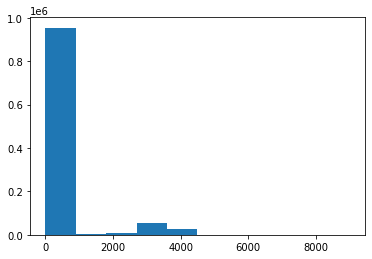

In [ ]:
plt.hist(data['Weight_baby'])

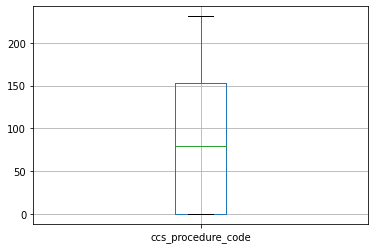

In [ ]:
data_cleaned.boxplot(column='ccs_procedure_code')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


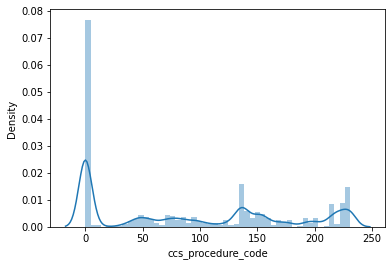

In [ ]:
sns.distplot(data_cleaned.ccs_procedure_code)

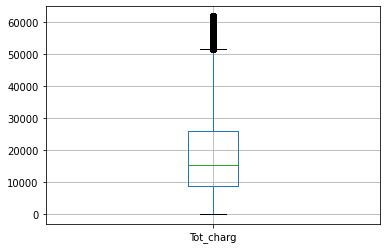

In [ ]:
data_cleaned.boxplot(column='Tot_charg')

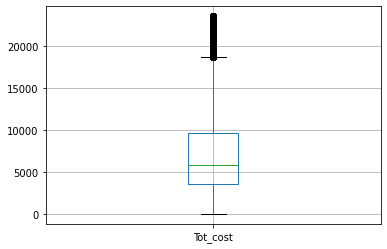

In [ ]:
data_cleaned.boxplot(column='Tot_cost')

# converting coloumns with string datatypes into categorical data using label encoder`

In [ ]:
labelencoder = LabelEncoder()
data_cleaned.iloc[:,0] = labelencoder.fit_transform(data_cleaned.iloc[:,0])
data_cleaned.iloc[:,1] = labelencoder.fit_transform(data_cleaned.iloc[:,1])
data_cleaned.iloc[:,3] = labelencoder.fit_transform(data_cleaned.iloc[:,3])
data_cleaned.iloc[:,4] = labelencoder.fit_transform(data_cleaned.iloc[:,4])
data_cleaned.iloc[:,5] = labelencoder.fit_transform(data_cleaned.iloc[:,5])
data_cleaned.iloc[:,6] = labelencoder.fit_transform(data_cleaned.iloc[:,6])
data_cleaned.iloc[:,8] = labelencoder.fit_transform(data_cleaned.iloc[:,8])
data_cleaned.iloc[:,9] = labelencoder.fit_transform(data_cleaned.iloc[:,9])
data_cleaned.iloc[:,12] = labelencoder.fit_transform(data_cleaned.iloc[:,12])
data_cleaned.iloc[:,15] = labelencoder.fit_transform(data_cleaned.iloc[:,15])
data_cleaned.iloc[:,17] = labelencoder.fit_transform(data_cleaned.iloc[:,17])
data_cleaned.iloc[:,18] = labelencoder.fit_transform(data_cleaned.iloc[:,18])

In [ ]:
X=data_cleaned.drop(['Result'],axis=1)
Y= data_cleaned.Result 

# Feature Importance with Extra Trees Classifier


In [ ]:
from pandas import read_csv
from sklearn.tree import  DecisionTreeClassifier
# feature extraction
model = DecisionTreeClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[1.44798407e-02 1.60687421e-02 3.89480439e-02 3.17072576e-02
 1.72932797e-02 1.84256832e-02 1.00117137e-02 4.21357094e-02
 1.41305078e-02 2.81059298e-02 6.66584276e-02 4.71053911e-02
 5.38601907e-02 2.85503425e-02 1.62345335e-02 3.64413513e-03
 0.00000000e+00 1.65158649e-05 7.75590560e-03 1.65808127e-01
 1.68127672e-01 1.84693587e-01 2.62384636e-02]


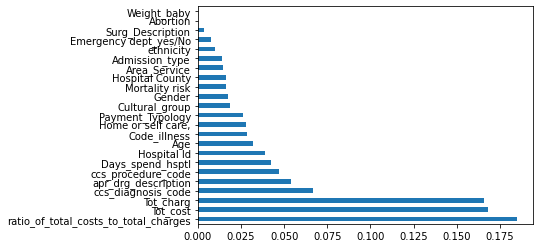

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(24).plot(kind='barh')
plt.show()

# Dropping the coloumns which don't have much impact on the target variable


In [ ]:
data_cleaned.drop(['Abortion','Surg_Description','Emergency dept_yes/No','ethnicity','Admission_type','Area_Service','Weight_baby','Hospital County','Gender','Cultural_group','Payment_Typology','Mortality risk'],inplace=True,axis=1)

In [ ]:
X1 = data_cleaned.drop(['Result'],axis=1)
Y= data_cleaned.Result 

#Smote Over Sampling`

In [ ]:
from imblearn.combine import SMOTETomek
smot = SMOTETomek(ratio="auto",random_state=42)
x_smot, y_smot = smot.fit_sample(X1,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [ ]:
from collections import Counter
print(Counter(Y))
print(Counter(y_smot))

Counter({1: 525966, 0: 175146})
Counter({1: 500819, 0: 500819})


In [ ]:
# splitting the data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_smot,y_smot,test_size=0.3) 

#Importing the all ML classifiers

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from xgboost import XGBClassifier

#Model Building using decision tree

In [ ]:
clf1 = DecisionTreeClassifier()
params1 = {'max_depth': range(6,11),
          'max_features': range(6,11),
          'criterion': ['gini','entropy']}
cv = StratifiedKFold(n_splits=3,random_state=42)  

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
grid = GridSearchCV(clf1,params1,cv=cv,n_jobs=-1,scoring='accuracy',error_score=0)
grid.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             error_score=0,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
           

In [ ]:
print("Best: %f using %s" % (grid.best_score_,grid.best_params_))

Best: 0.804912 using {'criterion': 'gini', 'max_depth': 10, 'max_features': 9}


###Model building using best Hyperparameters



In [ ]:
model1 = DecisionTreeClassifier(criterion='gini',max_depth=10,max_features=9)
model1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred1 = model1.predict(x_test)
y_pred1

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred1))
pd.crosstab(y_test,y_pred)

[[ 92520  57870]
 [  1016 149086]]


col_0,0,1
row_0,,
0,92520,57870
1,1016,149086


In [ ]:
train=round(model1.score(x_train,y_train) * 100, 2)
train

80.54

In [ ]:
test_acc=round(accuracy_score(y_test,y_pred1)*100,2)
test_acc

80.4

**XGBoost**

In [ ]:
clf2 = XGBClassifier()
n_estimators = [10,20,30]
learning_rate = [0.1,0.2]
subsample = [0.9,1.0,1.1]
max_depth = [7,9,11,13]

In [ ]:
params2 = dict(n_estimators=n_estimators,learning_rate=learning_rate,subsample=subsample,max_depth=max_depth)
cv = StratifiedKFold(n_splits=3,random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
grid = GridSearchCV(clf2,params2,scoring='accuracy',n_jobs=-1,cv=cv,error_score=0)
grid.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             error_score=0,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2],
                         'max_depth': [7, 9, 11, 13],
  

In [ ]:
print("Best: %f using %s" % (grid.best_score_,grid.best_params_))

Best: 0.829207 using {'learning_rate': 0.2, 'max_depth': 13, 'n_estimators': 30, 'subsample': 0.9}


###Model building using best Hyperparameters


In [ ]:
model2 = XGBClassifier(learning_rate= 0.2, max_depth= 13, n_estimators= 30, subsample= 0.9)
model2.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=13,
              min_child_weight=1, missing=None, n_estimators=30, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)

In [ ]:
y_pred2 = model2.predict(x_test)
y_pred2

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred2))
pd.crosstab(y_test,y_pred2)

[[ 99464  50926]
 [   276 149826]]


col_0,0,1
row_0,,
0,99464,50926
1,276,149826


In [ ]:
train=round(model2.score(x_train,y_train) * 100, 2)
train

83.39

In [ ]:
test_acc=round(accuracy_score(y_test,y_pred2)*100,2)
test_acc

82.96

**AdaBoost**

In [ ]:
clf3 = AdaBoostClassifier()
params3 = {'n_estimators': [10,20,50]}
cv = StratifiedKFold(n_splits=3,random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
grid = GridSearchCV(clf3,params3,scoring='accuracy',n_jobs=-1,cv=cv,error_score=0)
grid.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             error_score=0,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_estimators': [10, 20, 50]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='accuracy',
             verbose=0)

In [ ]:
print("Best: %f using %s" % (grid.best_score_,grid.best_params_))

Best: 0.786077 using {'n_estimators': 50}


In [ ]:
model3 = AdaBoostClassifier(DecisionTreeClassifier(criterion='gini',max_depth=10,max_features=9),n_estimators=50)
model3.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=10,
                                                         max_features=9,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

In [ ]:
y_pred3 = model3.predict(x_test)
y_pred3

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred3))
pd.crosstab(y_test,y_pred3)

[[102208  48182]
 [  5982 144120]]


col_0,0,1
row_0,,
0,102208,48182
1,5982,144120


In [ ]:
train=round(model3.score(x_train,y_train) * 100, 2)
train

84.77

In [ ]:
test_acc=round(accuracy_score(y_test,y_pred3)*100,2)
test_acc

81.97

**Logistic Regression**

In [ ]:
model4= LogisticRegression()
model4.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred4 = model.predict(x_test)
y_pred4

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred4))
pd.crosstab(y_test,y_pred4)

[[ 92643  57747]
 [   939 149163]]


col_0,0,1
row_0,,
0,92643,57747
1,939,149163


In [ ]:
train=round(Model4.score(x_train,y_train) * 100, 2)
train

50.48

In [ ]:
test_acc=round(accuracy_score(y_test,y_pred4)*100,2)
test_acc

80.47

# From the above methods we can finalize Decision Tree as the best method for the fraud detection